## Final Project Submission

Please fill out:
* Student name: Abass Ibrahim
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Business Aim
Our stakeholders are identified as "Potential property investors who aim to buy and sell". <br>
Our aim is to create a regression model that predicts house prices based on a number of features. <br>
For the entire process, we shall be using the **CRoss-Industry Standard Process for Data Mining (CRISP-DM)**. <br>
As such, are target variable is **price**.

## Data Understanding and Cleaning

### Import the necessary libraries

In [349]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

### Import the house data csv

In [450]:
orig_data = pd.read_csv('data/kc_house_data.csv')

# Firstly, we check that all of the columns to check their data types.
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [451]:
orig_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [452]:
# We should state our target variable. Price
# We can see the values for price are very large. We can divide them by 1,000,000 to get values in millions
y = orig_data['price'] / 1000000

# Of the remaining columns, all could act as features except for the id column. So this should be dropped.
feature_df = orig_data.drop(['id', 'price'], axis=1)

In [453]:
# From the column_names.md, we can see that these features would be our categorical variables
cat_X = ['date','bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']
cat_df = feature_df[cat_X]

# We can drop those from the feature_df dataframe so we can have only continuous variables
continuous_X = feature_df.drop(cat_X, axis=1)


## Data Preparation
Now we have a better idea of the data that we are dealing with, we should start cleaning it in preparation for our model.

In [454]:
# Let's have a look at the column values again in our continuous and categorical variables
continuous_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    21597 non-null  int64  
 1   sqft_lot       21597 non-null  int64  
 2   sqft_above     21597 non-null  int64  
 3   sqft_basement  21597 non-null  object 
 4   lat            21597 non-null  float64
 5   long           21597 non-null  float64
 6   sqft_living15  21597 non-null  int64  
 7   sqft_lot15     21597 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [455]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          21597 non-null  object 
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   floors        21597 non-null  float64
 4   waterfront    19221 non-null  object 
 5   view          21534 non-null  object 
 6   condition     21597 non-null  object 
 7   grade         21597 non-null  object 
 8   yr_built      21597 non-null  int64  
 9   yr_renovated  17755 non-null  float64
 10  zipcode       21597 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.8+ MB


In [456]:
# Interestingly, sqft_basement is registered as an object when it should be numerical
continuous_X['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2610.0        1
2730.0        1
1024.0        1
1008.0        1
2240.0        1
Name: sqft_basement, Length: 304, dtype: int64

When we run the value_counts we see that there is a "?" which has 454 counts. Evidently an NaN value.

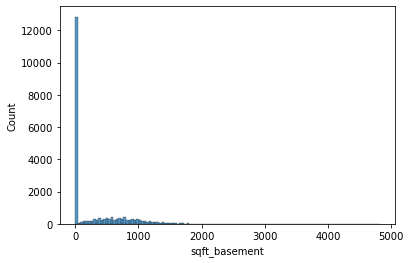

In [457]:
# We'll make a histogram to look at the distributions of the data in this column
sns.histplot(continuous_X.loc[continuous_X['sqft_basement'] != '?']['sqft_basement'].astype(float));

From the graph above we can see that 0 is clearly the modal value. And there are some extreme values towards 5000. <br>
Both the mode and median are 0. In this case, we shall use the modal of 0.
<br>
And then we shall convert that whole column into integers.

In [458]:
# We firstly replace all values of "?" with 0
continuous_X['sqft_basement'] = continuous_X['sqft_basement'].apply(lambda x: 0 if x == '?' else x)

# And then we turn the values in the column to floats
continuous_X['sqft_basement'] = continuous_X['sqft_basement'].astype(float)

In [459]:
# Whilst the data types check out, we can see there are missing values in 3 columns:

# waterfront, view & yr_renovated

# We shall calculate the percentages of values that are na within each column

print(len(cat_df[cat_df['waterfront'].isna() == True]) / len(cat_df['waterfront']))
print(len(cat_df[cat_df['view'].isna() == True]) / len(cat_df['view']))
print(len(cat_df[cat_df['yr_renovated'].isna() == True]) / len(cat_df['yr_renovated']))


0.11001527989998611
0.0029170718155299346
0.17789507802009538


In [460]:
# For each of the columns, we shall simply use their modal values to fill the na values.

# The largest proportion of na values is 17% so replacing values with the modal values should not be problematic.

cat_df['waterfront'].fillna(list(cat_df['waterfront'].mode())[0], inplace = True)
cat_df['view'].fillna(list(cat_df['view'].mode())[0], inplace = True)
cat_df['yr_renovated'].fillna(list(cat_df['yr_renovated'].mode())[0], inplace = True)

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [461]:
# We'll also check to see if any modal 0 values in any of the columns. These may actually be NaN values
for column in cat_df.columns:
    print(column, list(cat_df[column].mode()))
    
# A house may not have a basement thus has a 0 value.

date ['6/23/2014']
bedrooms [3]
bathrooms [2.5]
floors [1.0]
waterfront ['NO']
view ['NONE']
condition ['Average']
grade ['7 Average']
yr_built [2014]
yr_renovated [0.0]
zipcode [98103]


For categorical variables, only yr_renovated has modal 0 values. <br>
However, in context this is fine. A house may not have been revovated thus has a 0 value.

In [462]:
for column in continuous_X.columns:
    print(column, list(continuous_X[column].mode()))

sqft_living [1300]
sqft_lot [5000]
sqft_above [1300]
sqft_basement [0.0]
lat [47.5322, 47.5491, 47.6624, 47.6846]
long [-122.29]
sqft_living15 [1540]
sqft_lot15 [5000]


For continuous variables, only sqft_basement has modal 0 values. <br>
However, in context this is fine. A house may not have a basement thus has a 0 value.

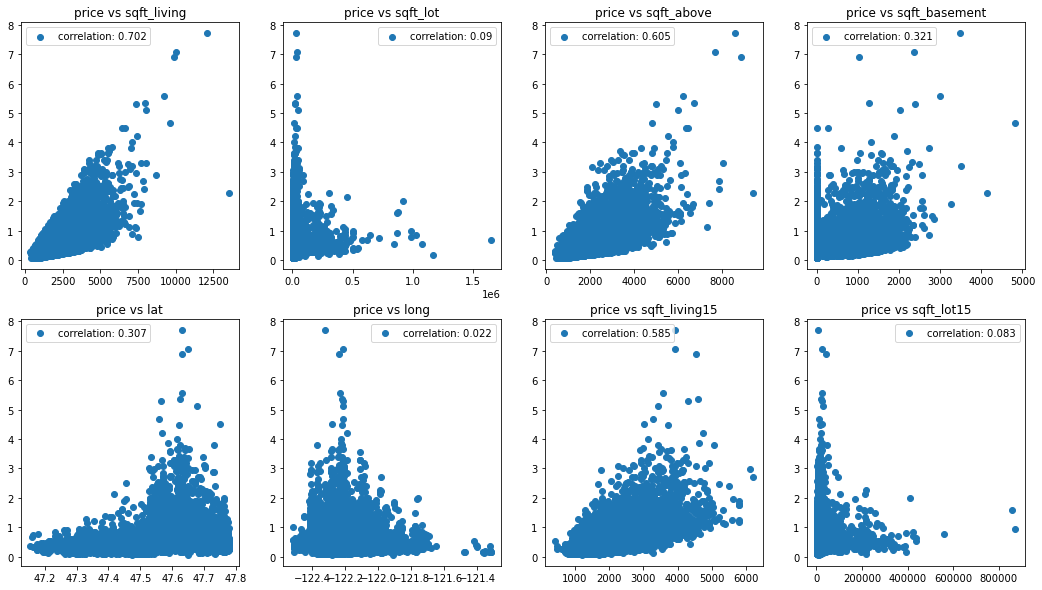

In [463]:
# Now we can plot a matrix of the continuous variables against the target variable
# The graph gives us a good idea of the distributions between each variable and the target variable.

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (18,10))
for column, ax in zip(continuous_X.columns, axes.flatten()):
    
    # We'll also check the correlations of price against each variable
    corr = round(pd.concat([continuous_X[column], y], axis=1).corr().iloc[0,1], 3)
    ax.scatter(continuous_X[column], y, label = f'correlation: {corr}')
    ax.set_title(f'price vs {column}')
    ax.legend()

Clearly sqft_living is the best correlated and longitude is the worst.
In addition, we see that lat, long and lot15 are very uncorrelated with price.

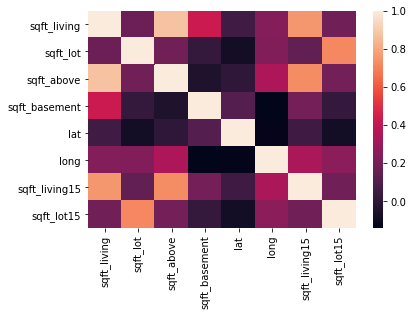

In [464]:
# We'll also create a heatmap to see which variables are highly correlated with each other.
# This is to avoid multicolinearity when making a model
sns.heatmap(continuous_X.corr());

We can filter out all variables that have a high correlation.

In [465]:
# First we'll create a dataframe based on the absolute correalation values
corr_df = continuous_X.corr().abs().stack().reset_index()

# Level_0 and level_1 refer to the variable names
# We then create a new column that is a tuple of the variable names
corr_df['pairs'] = list(zip(corr_df['level_0'], corr_df['level_1']))

# We'll make the pairs column the index
corr_df.set_index(['pairs'], inplace = True)

# We can then drop the level_0 and level_1 columns
corr_df.drop(columns = ['level_0', 'level_1'], inplace = True)

# We can then rename the '0' column to 'correlation'
corr_df.columns = ['correlation']

# From our heat map we can see that the only perfectly correlation variables are 2 of the same variables
# So we can drop rows that have a correlation of 1
corr_df = corr_df[corr_df['correlation'] != 1]

# Finally, we sort these values by correlation in descending order
corr_df.sort_values(by=['correlation'], ascending = False, inplace = True)

# We also need to get rid of duplicate values e.g. A and B is the same as B and A
corr_df.drop_duplicates(inplace = True)

# Now we can isolate those which are highly correlated
corr_df[corr_df['correlation'] >=0.75]

,correlation
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living15, sqft_living)",0.756402


We see that there are only 2 sets of highly correlated variables.


# Model Building

## Holdout test

In [467]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    continuous_X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1
)

## Baseline Model
This initial model will be extremely basic. It will simply take the price data and the continuous variables. <br>
We will be validating our predictions using the k fold validation method. <br> <br>
**Summary:** <br>
> *train R squared* = **0.584** <br>
> *test R squared* = **0.579**

In [468]:
from sklearn.linear_model import LinearRegression
model1_linreg = LinearRegression()
model1_linreg.fit(continuous_X, y)

LinearRegression()

In [469]:
model1_scores = cross_validate(
                        model1_linreg, X_train, y_train, cv=20, 
                        return_train_score=True
)

In [480]:
model1_y_hat = model1_linreg.predict(continuous_X)
model1_mean_train = np.mean(model1_scores['train_score'])
model1_test_score = np.mean(model1_scores['test_score'])
model_1_RMSE = np.sqrt(mean_squared_error(y, model1_y_hat))
model1_r_squared_diff = model1_mean_train - model1_test_score

print(f'Train R squared: {model1_mean_train} | test R squared: {model1_test_score} | RMSE = ${model_1_RMSE}(m)')
print(f'Difference in R squared | {model1_r_squared_diff}')

Train R squared: 0.5842716365406895 | test R squared: 0.5789883079178433 | RMSE = $0.23479393078409308(m)
Difference in R squared | 0.005283328622846195


**Summary** <br>
An R squared value of 0.58 is a good position to start. <br>
We also see a small difference between 

### Baseline Model